# Capstone 3: Genetic Data Multi-Class Classification

In this notebook, I will do the Data Wrangling and Exploratory Data Analysis for a dataset from Kaggle.com titled [Of Genomes and Genetics](https://www.kaggle.com/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge). In this dataset there are over 30,000 entries with 45 column features. In the data wrangling section I will cut down on unneeded variables as well as decide how to deal with missing values and find if any scaling or transformation of numeric values is needed

In [2]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Loading data
df_train = pd.read_csv('train.csv')
pd.set_option("display.max_rows", None)
df_train.head(1)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy


In [5]:
# Loading data - may be unnecessary
df_test = pd.read_csv('test.csv')
df_test.head(1)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.0,slightly abnormal,True,True,True,True,True


---

The data has already been split into training and test sets, but for consistency across the data, I will look into joining the datasets to clean the data as a whole before again splitting the data into training and test sets.      

In order to join the datasets I need to compare column names to ensure that the data lines up correctly

We can see that in the test set the Genetic Disorder, and the Disorder Subclass have been removed as the test set is meant to predict these features. Therefore we have to leave the datasets seperate, and clean the datasets side by side

In [6]:
# Investigating data to see if there are any obvious variables that are unneeded
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [10]:
# off the bat we can drop the patients, and parents names, as well as the institue and the name of the institute as 
# this does not affect genetic outcome
df_train.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name",
           'Institute Name', 'Institute Name', 'Location of Institute', 'Status', 'Place of birth',
           ], axis = 1, inplace = True)

train = df_train.rename(columns = {'Patient Age':'Patient_Age', "Genes in mother's side":"Genes_in_mothers_side",
            'Inherited from father':'Inherited_from_father',
            'Maternal gene':'Maternal_gene', 'Paternal gene':'Paternal_gene',
            'Blood cell count (mcL) ':'Blood_cell_count', "Father's age":'Fathers_age', "Mother's age":'Mothers_age',
            'Respiratory Rate (breaths/min)':'Respiratory_Rate', 'Heart Rate (rates/min':'Heart_Rate',
            'Test 1':'Test_1', 'Test 2':'Test_2', 'Test 3':'Test_3',
            'Test 4':'Test_4', 'Test 5':'Test_5', 'Parental consent': 'Parental_consent', 'Follow-up':'Follow_up', 
             'Birth asphyxia':'Birth_asphyxia',
             'Autopsy shows birth defect (if applicable)': 'Autopsy_shows_birth_defect', 
             'Folic acid details (peri-conceptional)':'Folic_acid_details', 
            'H/O serious maternal illness':'HO_serious_maternal_illness',
            'H/O radiation exposure (x-ray)':'HO_radiation_exposure', 'H/O substance abuse':'HO_substance_abuse',
            'Assisted conception IVF/ART':'Assisted_conception_IVFART', 
            'History of anomalies in previous pregnancies':'History_of_anomalies_in_previous_pregnancies',
            'No. of previous abortion':'No_of_previous_abortion', 'Birth defects':'Birth_defects', 
            'White Blood cell count (thousand per microliter)':'White_Blood_cell_count', 
            'Blood test result':'Blood_test_result',
            'Symptom 1':'Symptom_1', 'Symptom 2':'Symptom_2', 'Symptom 3':'Symptom_3', 'Symptom 4':'Symptom_4', 
            'Symptom 5':'Symptom_5',
            'Genetic Disorder':'Genetic_Disorder', 'Disorder Subclass':'Disorder_Subclass', 
            'Blood cell count (mcL)': 'Blood_cell_count'})

In [46]:
df_test.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name",
           'Institute Name', 'Institute Name', 'Location of Institute', 'Status', 'Place of birth',
           ], axis = 1, inplace = True)

test = df_test.rename(columns = {'Patient Age':'Patient_Age', "Genes in mother's side":"Genes_in_mothers_side",
            'Inherited from father':'Inherited_from_father',
            'Maternal gene':'Maternal_gene', 'Paternal gene':'Paternal_gene',
            'Blood cell count (mcL) ':'Blood_cell_count', "Father's age":'Fathers_age', "Mother's age":'Mothers_age',
            'Respiratory Rate (breaths/min)':'Respiratory_Rate', 'Heart Rate (rates/min':'Heart_Rate',
            'Test 1':'Test_1', 'Test 2':'Test_2', 'Test 3':'Test_3',
            'Test 4':'Test_4', 'Test 5':'Test_5', 'Parental consent': 'Parental_consent', 'Follow-up':'Follow_up', 
             'Birth asphyxia':'Birth_asphyxia',
             'Autopsy shows birth defect (if applicable)': 'Autopsy_shows_birth_defect', 
             'Folic acid details (peri-conceptional)':'Folic_acid_details', 
            'H/O serious maternal illness':'HO_serious_maternal_illness',
            'H/O radiation exposure (x-ray)':'HO_radiation_exposure', 'H/O substance abuse':'HO_substance_abuse',
            'Assisted conception IVF/ART':'Assisted_conception_IVFART', 
            'History of anomalies in previous pregnancies':'History_of_anomalies_in_previous_pregnancies',
            'No. of previous abortion':'No_of_previous_abortion', 'Birth defects':'Birth_defects', 
            'White Blood cell count (thousand per microliter)':'White_Blood_cell_count', 
            'Blood test result':'Blood_test_result',
            'Symptom 1':'Symptom_1', 'Symptom 2':'Symptom_2', 'Symptom 3':'Symptom_3', 'Symptom 4':'Symptom_4', 
            'Symptom 5':'Symptom_5',
            'Genetic Disorder':'Genetic_Disorder', 'Disorder Subclass':'Disorder_Subclass', 
            'Blood cell count (mcL)': 'Blood_cell_count'})

In [13]:
train.head().T

,0,1,2,3,4
Patient_Age,2,4,6,12,11
Genes_in_mothers_side,Yes,Yes,Yes,Yes,Yes
Inherited_from_father,No,Yes,No,No,No
Maternal_gene,Yes,No,No,Yes,NaN
Paternal_gene,No,No,No,No,Yes
Blood_cell_count,4.7606,4.91067,4.8933,4.70528,4.7207
Mothers_age,NaN,NaN,41,21,32
Fathers_age,NaN,23,22,NaN,NaN
Respiratory_Rate,Normal (30-60),Tachypnea,Normal (30-60),Tachypnea,Tachypnea
Heart_Rate,Normal,Normal,Tachycardia,Normal,Tachycardia


In [14]:
#check null value counts
train.isna().sum()

Patient_Age                                     1427
Genes_in_mothers_side                              0
Inherited_from_father                            306
Maternal_gene                                   2810
Paternal_gene                                      0
Blood_cell_count                                   0
Mothers_age                                     6036
Fathers_age                                     5986
Respiratory_Rate                                2149
Heart_Rate                                      2113
Test_1                                          2127
Test_2                                          2152
Test_3                                          2147
Test_4                                          2140
Test_5                                          2170
Parental_consent                                2125
Follow_up                                       2166
Gender                                          2173
Birth_asphyxia                                

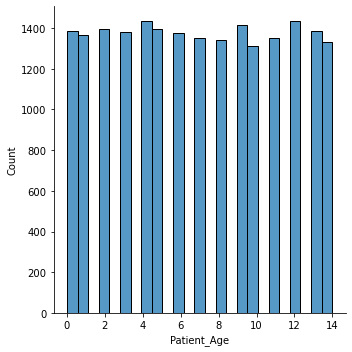

In [16]:
# look at spread of patient ages and parent ages
sns.displot(x = 'Patient_Age', data = train)

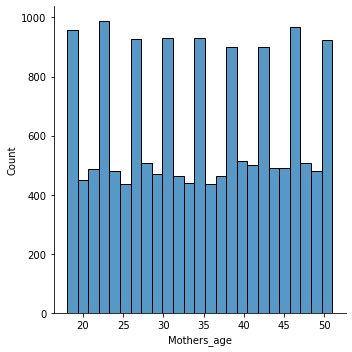

In [17]:
sns.displot(x = 'Mothers_age', data = train)

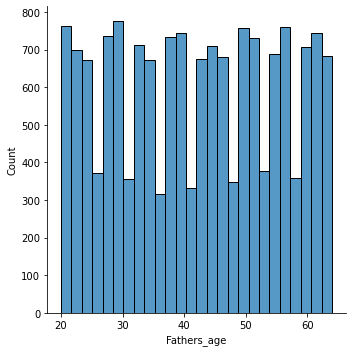

In [18]:
sns.displot(x = 'Fathers_age',data = train)

<AxesSubplot:xlabel='Genetic_Disorder', ylabel='count'>

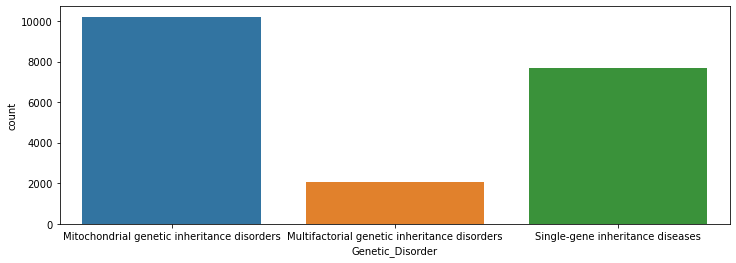

In [20]:
# Vizualize the count of genetic disorders
plt.figure(figsize = (12,4))
sns.countplot(x = 'Genetic_Disorder', data = train)

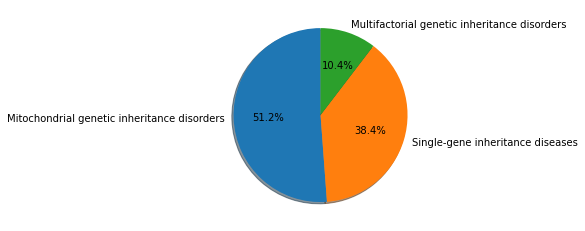

In [23]:
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)

plt.pie(train.Genetic_Disorder.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90);

<AxesSubplot:xlabel='Disorder_Subclass', ylabel='count'>

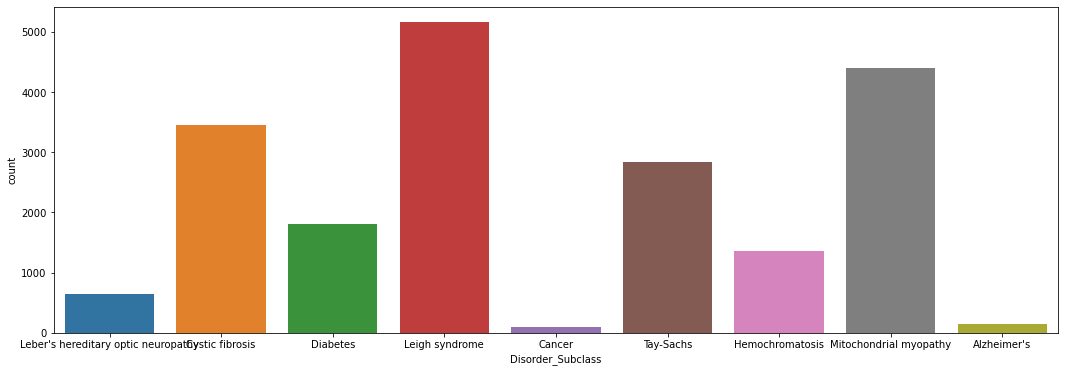

In [21]:
# Vizualize the count of disorder subclasses
plt.figure(figsize = (18,6))
sns.countplot(x = 'Disorder_Subclass', data = train)

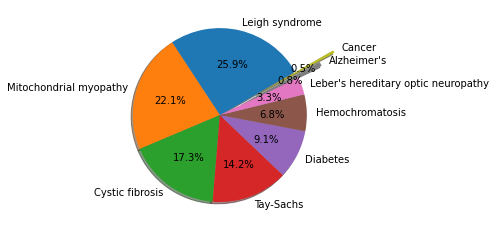

In [24]:
#visualizing in Pie chart
labels2 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode2 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)

plt.pie(train.Disorder_Subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

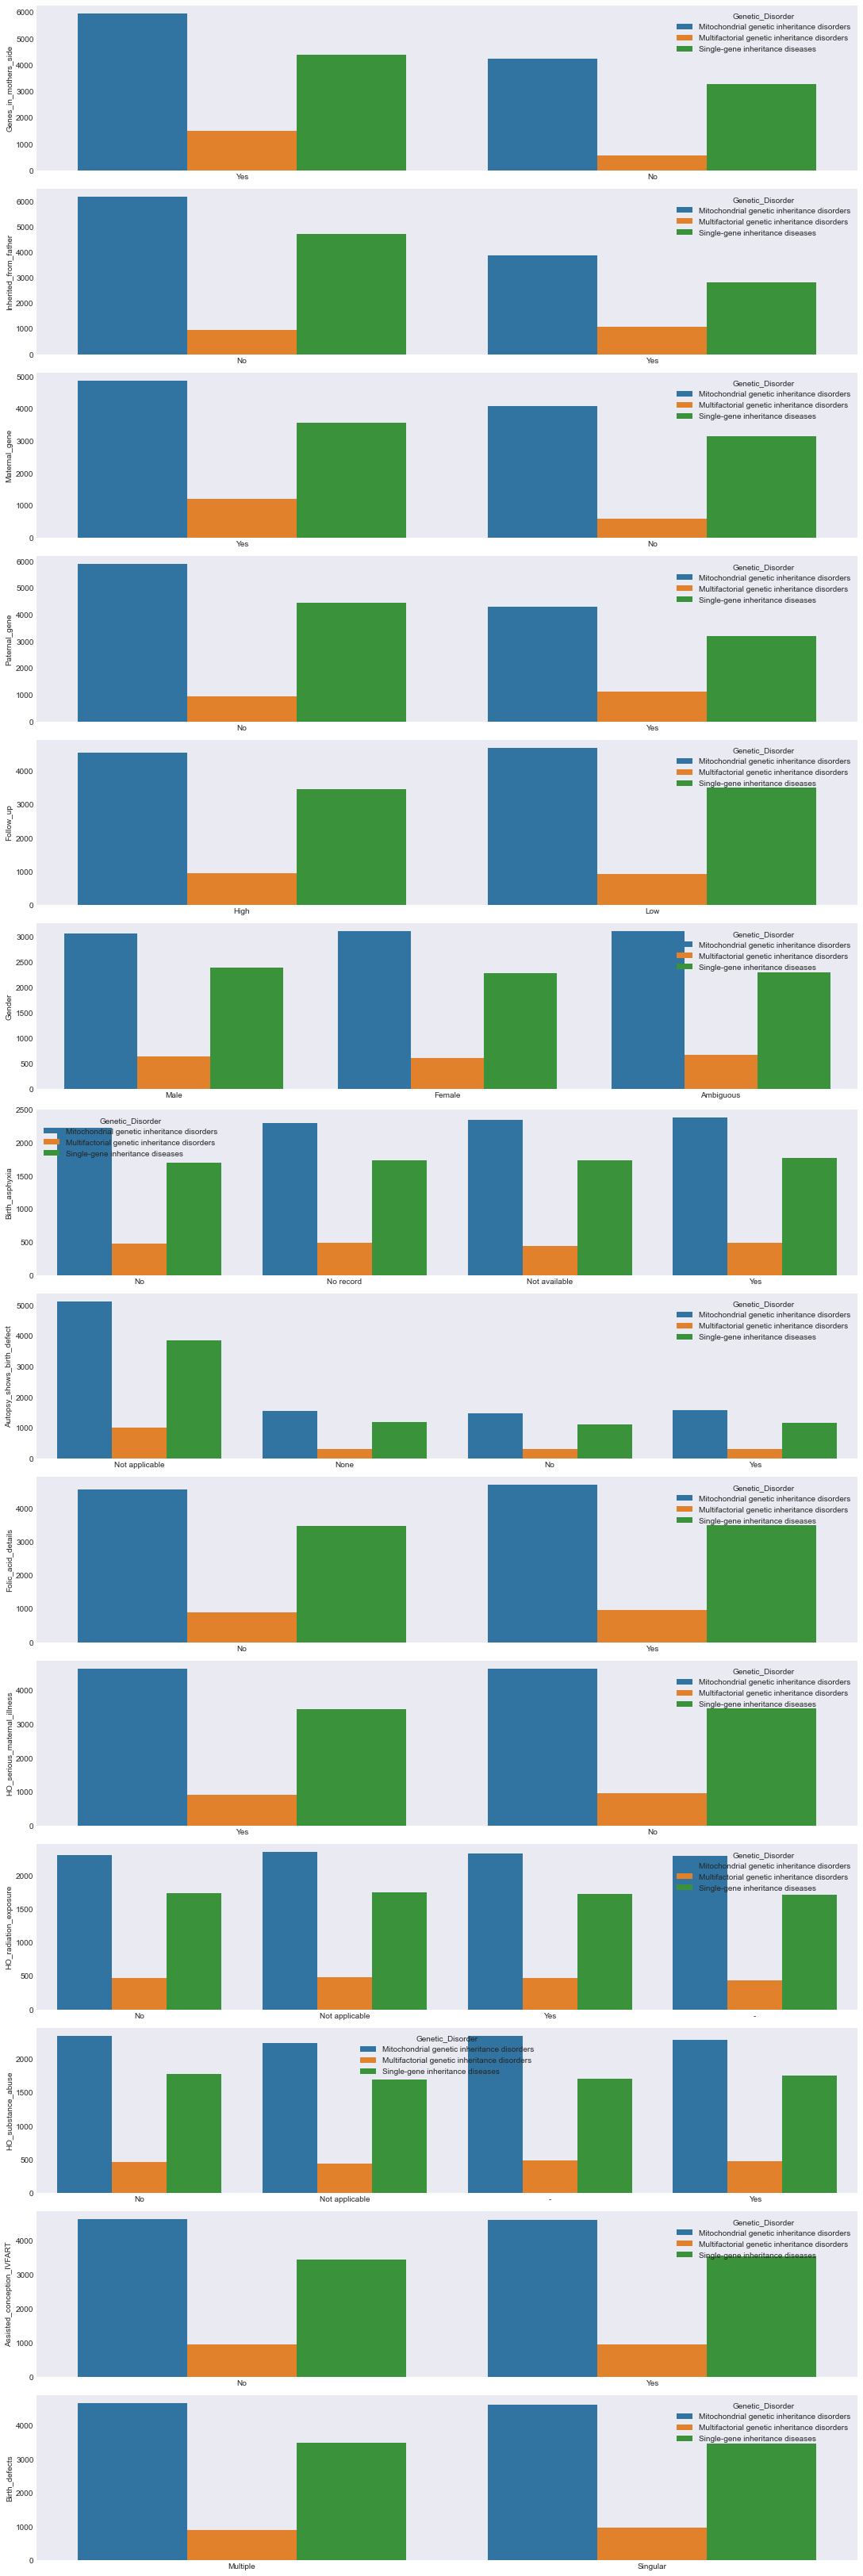

In [25]:
# vizualize the relationships between target variables and features
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
         'Follow_up', 'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect', 'Folic_acid_details', 'HO_serious_maternal_illness',
         'HO_radiation_exposure', 'HO_substance_abuse', 'Assisted_conception_IVFART', 'Birth_defects']

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

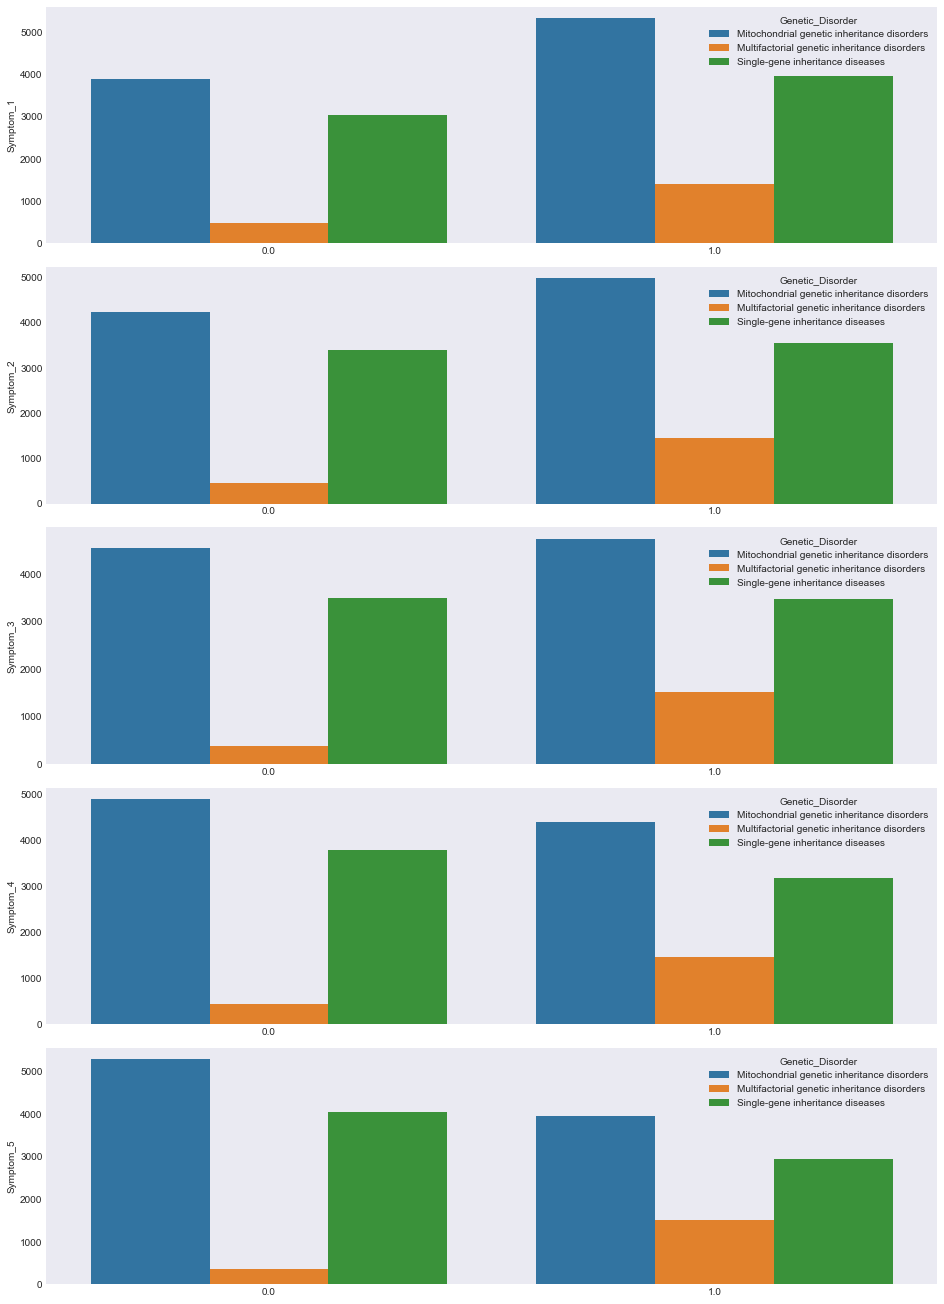

In [47]:
# Vizualize the relationship between symptoms and genetic disorders
symptom  = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (13, 18), constrained_layout = True)

for i, var in enumerate(symptom): 
    sns.countplot(data = train, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

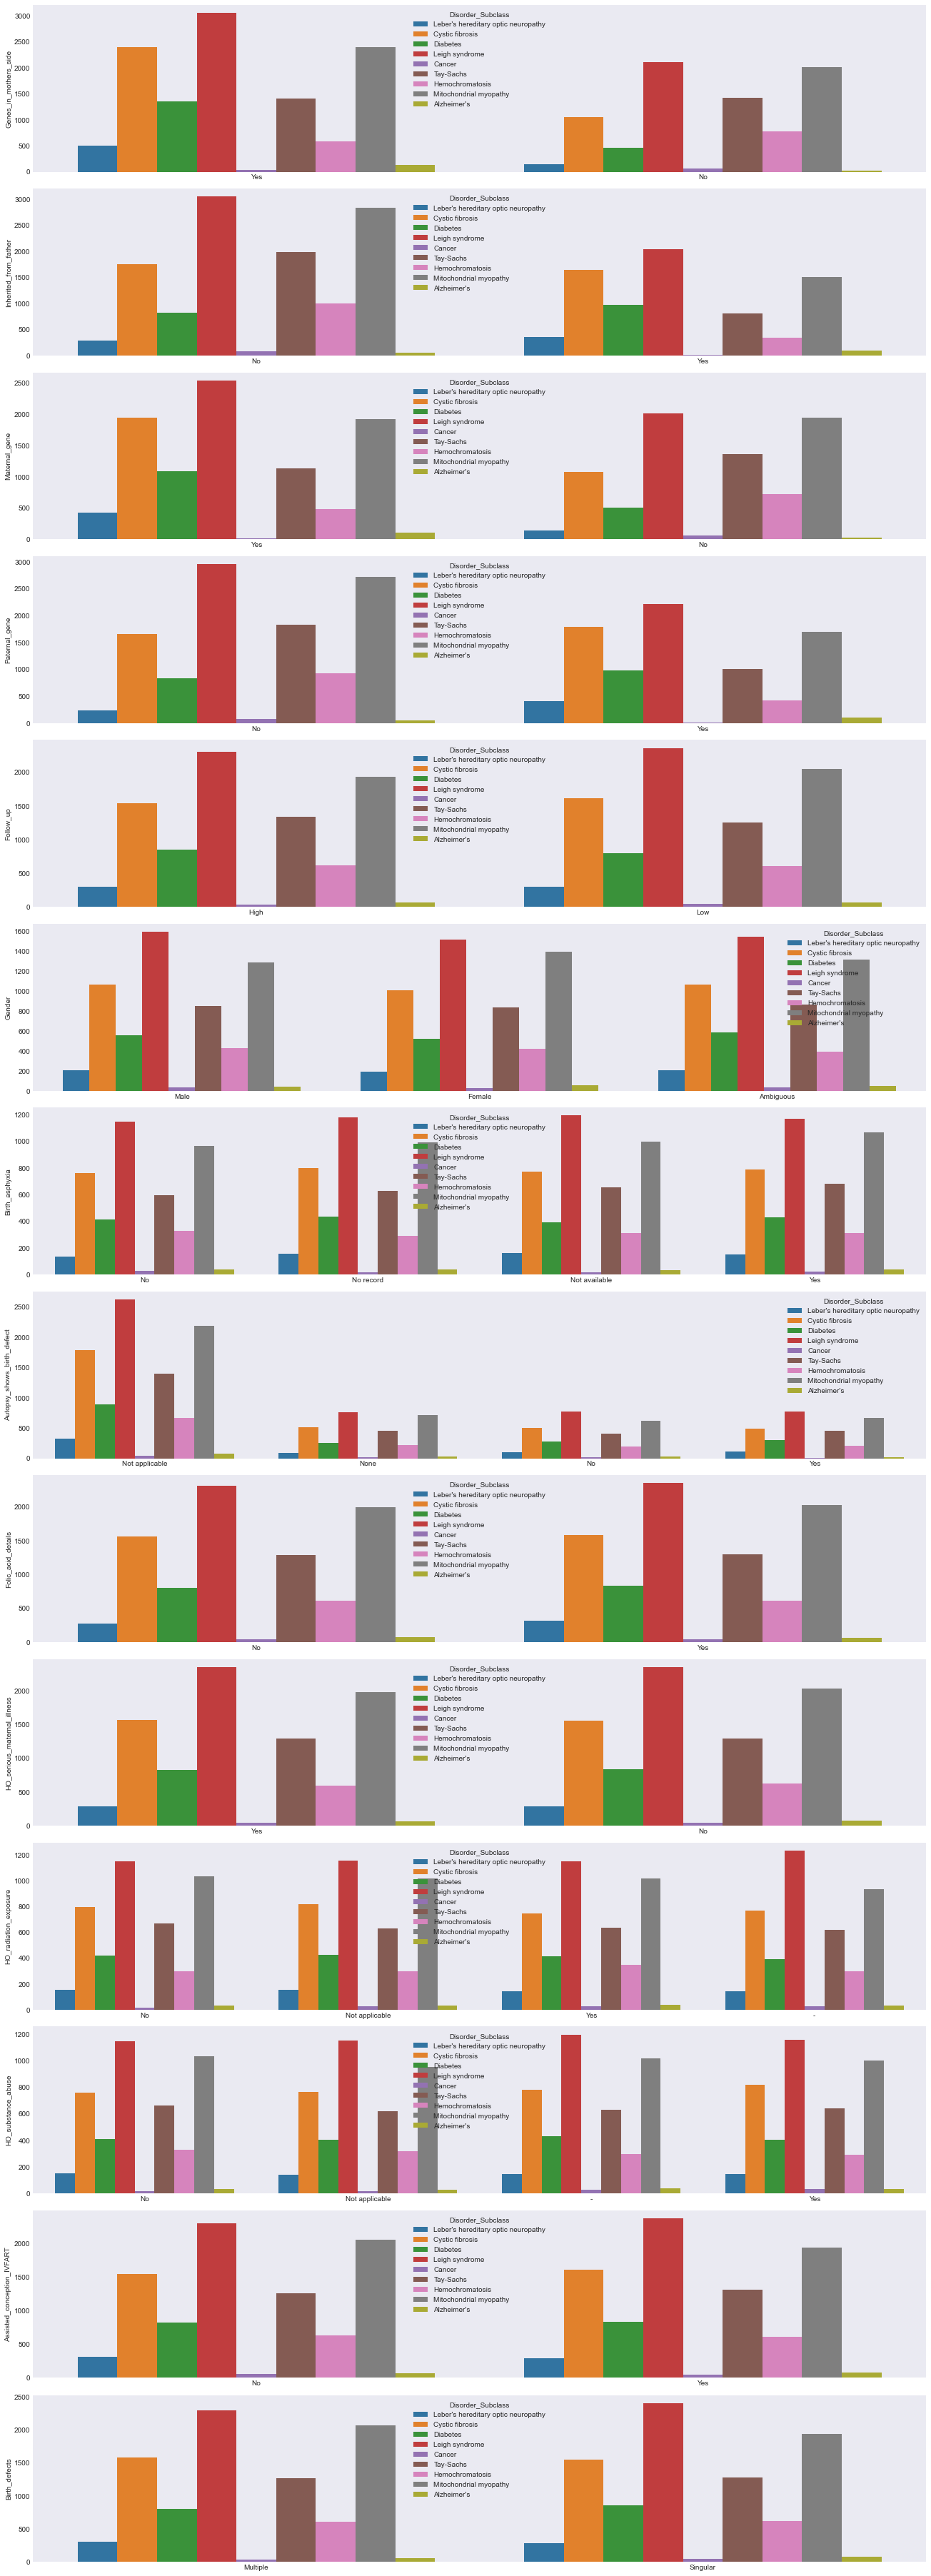

In [27]:
# Vizualize the relationship between disorder subclasses and features
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
         'Follow_up', 'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect', 'Folic_acid_details', 'HO_serious_maternal_illness',
         'HO_radiation_exposure', 'HO_substance_abuse', 'Assisted_conception_IVFART', 'Birth_defects']

fig, ax = plt.subplots(len(cols),  figsize = (18, 50), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

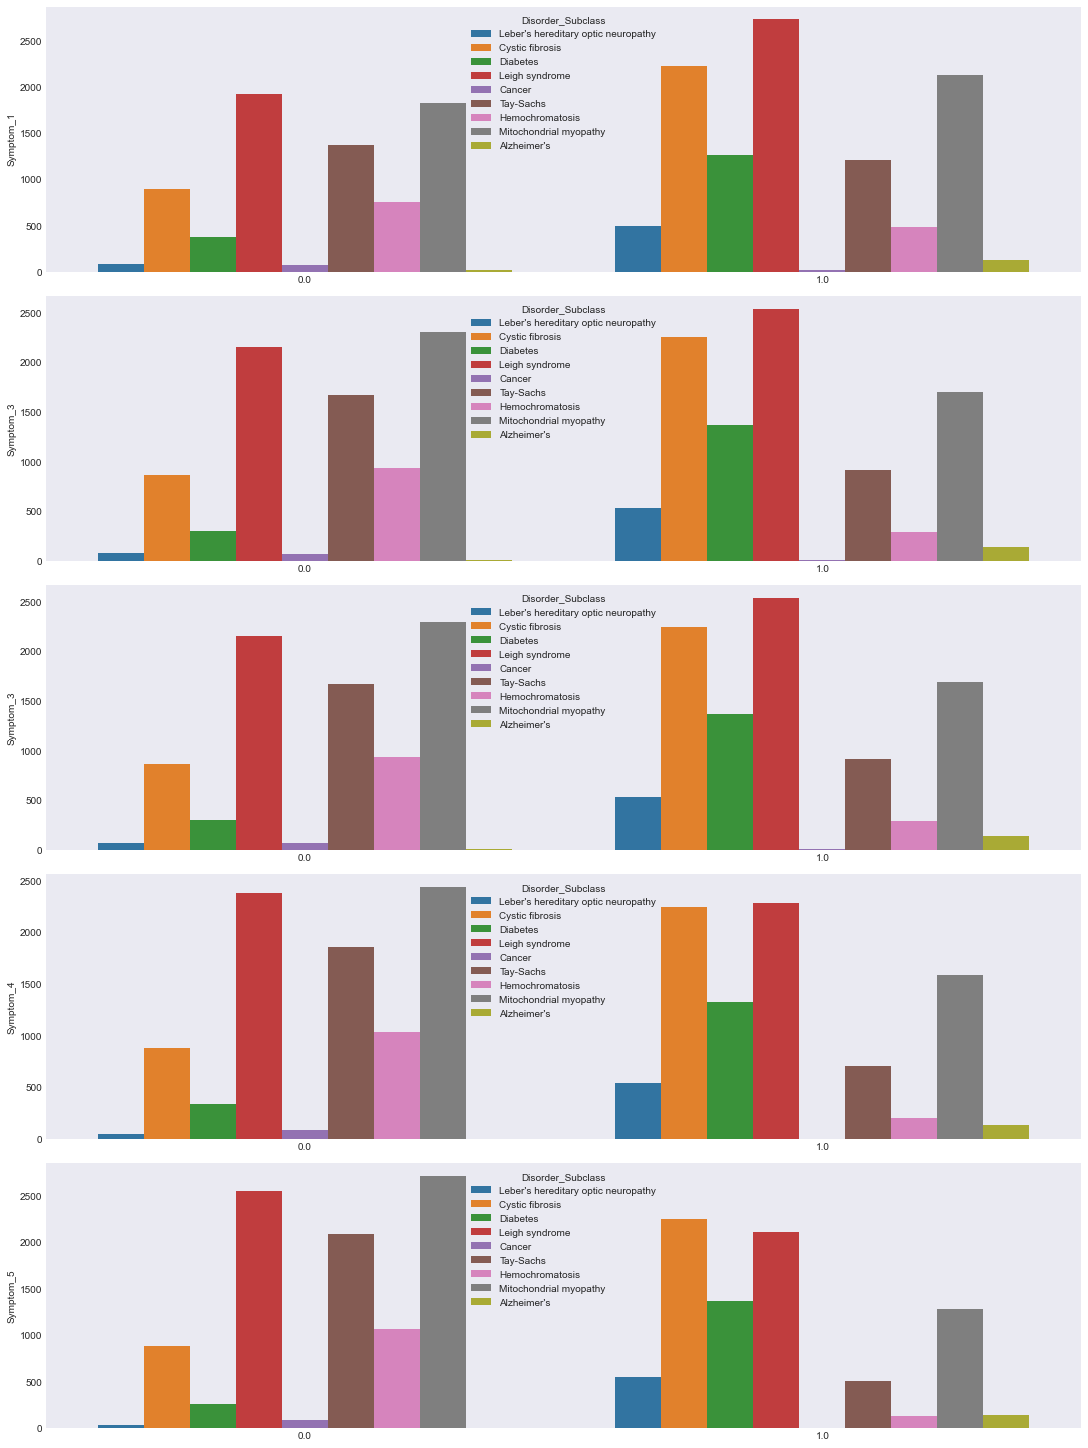

In [28]:
# Vizualize the relationship between symptoms and disorder subclass
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (15, 20), constrained_layout = True)

for i, var in enumerate(symptom): 
    sns.countplot(data = train, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

In [29]:
from scipy.stats import chi2_contingency

In [34]:
# look at the significance of features in regard to genetic disorder
for i in list(train.columns):
    contingency = pd.crosstab(train[i], train['Genetic_Disorder'])
    c,p,dof, expected = chi2_contingency(contingency)
    print(i, " p value for chi2 test: ", p)


Patient_Age  p value for chi2 test:  0.9528379647146339
Genes_in_mothers_side  p value for chi2 test:  1.1467655663681908e-38
Inherited_from_father  p value for chi2 test:  3.001679792644031e-38
Maternal_gene  p value for chi2 test:  1.2927887155021174e-25
Paternal_gene  p value for chi2 test:  3.452529030466087e-25
Blood_cell_count  p value for chi2 test:  0.49623280963407057
Mothers_age  p value for chi2 test:  0.9637048437783521
Fathers_age  p value for chi2 test:  0.3426921330888962
Respiratory_Rate  p value for chi2 test:  0.5317438374039304
Heart_Rate  p value for chi2 test:  0.49376546992393133
Test_1  p value for chi2 test:  1.0
Test_2  p value for chi2 test:  1.0
Test_3  p value for chi2 test:  1.0
Test_4  p value for chi2 test:  1.0
Test_5  p value for chi2 test:  1.0
Parental_consent  p value for chi2 test:  1.0
Follow_up  p value for chi2 test:  0.499725591647869
Gender  p value for chi2 test:  0.19805193471152902
Birth_asphyxia  p value for chi2 test:  0.5693237589590914
A

In [36]:
# only the features that are significant, therefore can conclude these are not independant from Genetic Subclass
for i in list(train.columns):
    contingency = pd.crosstab(train[i], train['Genetic_Disorder'])
    c,p,dof, expected = chi2_contingency(contingency)
    if p < 0.05:
        print(i, " p value for chi2 test: ", p)

Genes_in_mothers_side  p value for chi2 test:  1.1467655663681908e-38
Inherited_from_father  p value for chi2 test:  3.001679792644031e-38
Maternal_gene  p value for chi2 test:  1.2927887155021174e-25
Paternal_gene  p value for chi2 test:  3.452529030466087e-25
Blood_test_result  p value for chi2 test:  0.001679257943707886
Symptom_1  p value for chi2 test:  2.247982145630757e-46
Symptom_2  p value for chi2 test:  9.215941215610407e-85
Symptom_3  p value for chi2 test:  2.999850462213498e-128
Symptom_4  p value for chi2 test:  1.0122534825925479e-142
Symptom_5  p value for chi2 test:  3.465776098290755e-218
Genetic_Disorder  p value for chi2 test:  0.0
Disorder_Subclass  p value for chi2 test:  0.0


In [35]:
# chi square test for independance in disorder subclass
for i in list(train.columns):
    contingency = pd.crosstab(train[i], train['Disorder_Subclass'])
    c,p,dof, expected = chi2_contingency(contingency)
    print(i, " p value for chi2 test: ", p)

Patient_Age  p value for chi2 test:  0.3775407905349173
Genes_in_mothers_side  p value for chi2 test:  8.008984833300492e-167
Inherited_from_father  p value for chi2 test:  1.0456427733813996e-146
Maternal_gene  p value for chi2 test:  1.2214538777261223e-128
Paternal_gene  p value for chi2 test:  3.7713333352110493e-115
Blood_cell_count  p value for chi2 test:  0.493875099834991
Mothers_age  p value for chi2 test:  0.2738099743494499
Fathers_age  p value for chi2 test:  0.7441404855744304
Respiratory_Rate  p value for chi2 test:  0.7965178098631832
Heart_Rate  p value for chi2 test:  0.5255792079907651
Test_1  p value for chi2 test:  1.0
Test_2  p value for chi2 test:  1.0
Test_3  p value for chi2 test:  1.0
Test_4  p value for chi2 test:  1.0
Test_5  p value for chi2 test:  1.0
Parental_consent  p value for chi2 test:  1.0
Follow_up  p value for chi2 test:  0.21699929813807933
Gender  p value for chi2 test:  0.30670140573207305
Birth_asphyxia  p value for chi2 test:  0.82079124229803

In [45]:
# variables that are significant, therefore can conclude these variables are not independant of Disorder Subclass
for i in list(train.columns):
    contingency = pd.crosstab(train[i], train['Disorder_Subclass'])
    c,p,dof, expected = chi2_contingency(contingency)
    if (p < 0.05):
         print(i, " p value for chi2 test: ", p)

Genes_in_mothers_side  p value for chi2 test:  8.008984833300492e-167
Inherited_from_father  p value for chi2 test:  1.0456427733813996e-146
Maternal_gene  p value for chi2 test:  1.2214538777261223e-128
Paternal_gene  p value for chi2 test:  3.7713333352110493e-115
Blood_test_result  p value for chi2 test:  0.04605897678885529
Symptom_1  p value for chi2 test:  1.5267241061175745e-233
Symptom_2  p value for chi2 test:  0.0
Symptom_3  p value for chi2 test:  0.0
Symptom_4  p value for chi2 test:  0.0
Symptom_5  p value for chi2 test:  0.0
Genetic_Disorder  p value for chi2 test:  0.0
Disorder_Subclass  p value for chi2 test:  0.0
